# **Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, SpectralEmbedding
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, davies_bouldin_score

# **Pre-processing**

In [2]:
random_state = 1000
df = pd.read_csv("Stars.csv")

In [3]:
df = df.dropna()

In [4]:
y = df['Type']
X = df.drop('Type', axis=1)

In [5]:
# Turning colors and spectral class columns into unique int values
unique_values = X['Color'].unique()
mapping = {value: index + 1 for index, value in enumerate(unique_values)}
X['Color'] = X['Color'].map(mapping)
unique_values = X['Spectral_Class'].unique()
mapping = {value: index + 1 for index, value in enumerate(unique_values)}
X['Spectral_Class'] = X['Spectral_Class'].map(mapping)

In [6]:
scale = StandardScaler()
X_sc = scale.fit_transform(X)

# **t-SNE and Spectral Embedding**

In [7]:
# t-SNE
tsne = TSNE(n_jobs=-1, random_state=random_state)
X_tsne = tsne.fit_transform(X_sc)

In [8]:
# Spectral Embedding
spectral_embedding = SpectralEmbedding(n_jobs=-1, random_state=random_state, affinity="nearest_neighbors")
X_spectral = spectral_embedding.fit_transform(X_sc)

**Visualizing the dataset**

In [9]:
class_mapping = {
    0: 'Red Dwarf',
    1: 'Brown Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Super Giants',
    5: 'Hyper Giants'
}

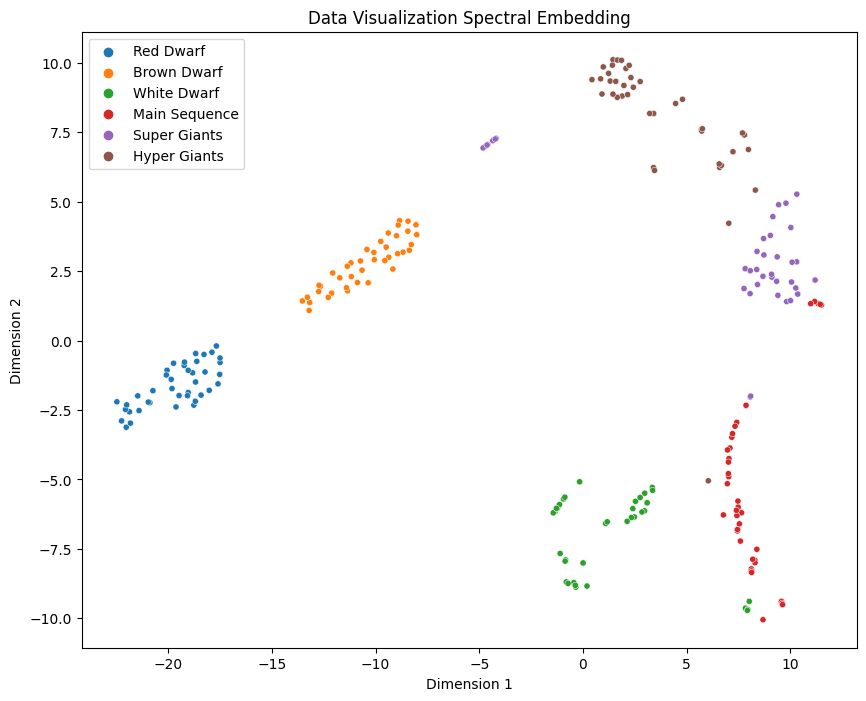

In [10]:
df_embed = pd.DataFrame(data={'X1': X_tsne[:, 0], 'X2': X_tsne[:, 1], 'Class': y.replace(class_mapping)})
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X1', y='X2', hue='Class', data=df_embed, palette='tab10', legend='full', s=20)
plt.title('Data Visualization Spectral Embedding')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

# **Spectral Clustering**

In [ ]:
spectral_clustering = SpectralClustering(n_clusters = 6, random_state=random_state, affinity='nearest_neighbors')
predictions = spectral_clustering.fit_predict(X_tsne)

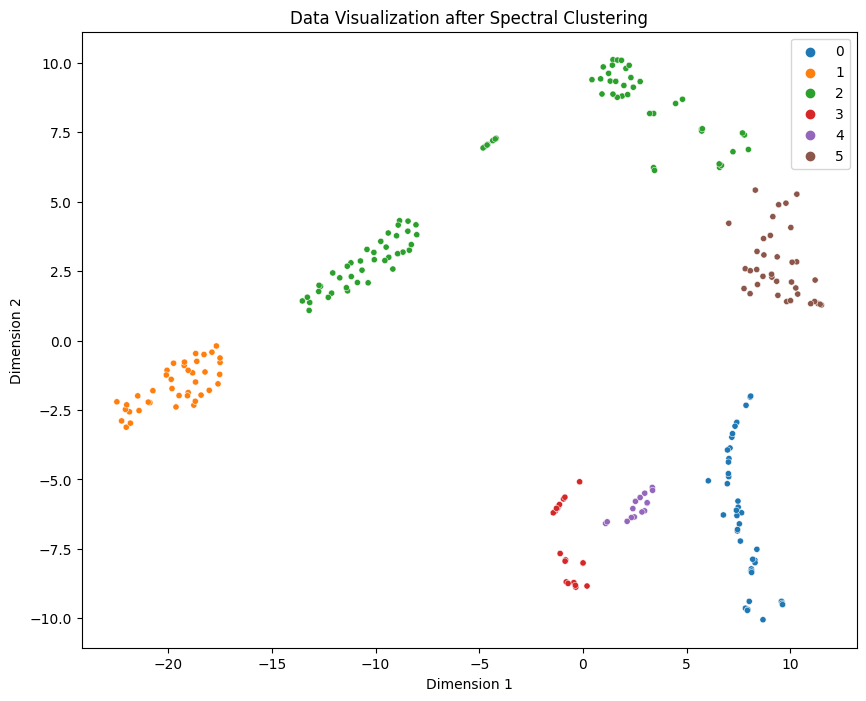

In [12]:
df_embed = pd.DataFrame(data={'X1': X_tsne[:, 0], 'X2': X_tsne[:, 1], 'Class': predictions})
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X1', y='X2', hue='Class', data=df_embed, palette='tab10', legend='full', s=20)
plt.title('Data Visualization after Spectral Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='upper right')
plt.show()

evaluation

In [13]:
s_score = silhouette_score(X_tsne, predictions)
h_score = homogeneity_score(y, predictions)
c_score = completeness_score(y, predictions)
v_score = v_measure_score(y, predictions)
d_score = davies_bouldin_score(X_tsne, predictions)
print(s_score, h_score, c_score, v_score, d_score)

0.4690885 0.6984463307851615 0.7619555958249477 0.7288200329349968 0.5784629454040119
